# Implied Volatility Scalping Strategy

## Concept Overview
Implied Volatility (IV) Scalping is a short-term trading strategy in options markets that aims to profit from fluctuations in implied volatility, rather than price direction. The trader seeks to buy options when IV is low and sell when IV is high, often using neutral strategies (e.g., straddles, strangles) or delta-neutral positions.

## Example thresholds:
Buy when IV Percentile < 20%
Sell when IV Percentile > 80%

## Example (Short Straddle):
Sell 1 ATM Call  
Sell 1 ATM Put  

## Exit Strategy
Close the trade when:
IV expands and premium increases.
Time decay starts to hurt the position.
Pre-defined P/L target or stop-loss is hit.

# Project Logic
This project implements an Implied Volatility Scalping Strategy using options data. The strategy is based on trading volatility extremes rather than price direction.



In [1]:
# --- Imports ---
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.simplefilter('ignore')

plt.style.use('seaborn-v0_8-darkgrid')

In [2]:
# --- Load and Cleaning Function for All DataFrames ---
def load_and_prepare(path):
    df_uncleaned = pd.read_csv(path)

    cols = ["Date", "Time", "Future Price", "Contract", "Expiry", "ATM Strike",
            "Strike Price", "Call Delta", "Call IV", "Put IV", "Call Bid Qty",
            "Call Bid", "Call Ask", "Call Ask Qty", "Put Bid Qty", "Put Bid", "Put Ask", "Put Ask Qty"]
    
    df_uncleaned.columns = cols + [f"Unnamed_{i}" for i in range(len(cols), df_uncleaned.shape[1])]
    df_raw = df_uncleaned.iloc[:, :18].copy()

    df_raw['Timestamp'] = pd.to_datetime(df_raw['Time'], format='mixed').dt.strftime('%H:%M:%S')
    df_raw['Call Mid Price'] = (df_raw['Call Bid'] + df_raw['Call Ask']) / 2
    df_raw['Put Mid Price'] = (df_raw['Put Bid'] + df_raw['Put Ask']) / 2
    df_raw = df_raw[(df_raw['Call IV'] > 0) & (df_raw['Put IV'] > 0)]
    df_raw.dropna(inplace=True)
    df_raw['Expiry'] = pd.to_datetime(df_raw['Expiry'])
    df_raw['Date'] = pd.to_datetime(df_raw['Date'])

    df_raw['Combined IV'] = (df_raw['Call IV'] + df_raw['Put IV']) / 2
    df_raw['Combined Premium'] = df_raw['Call Mid Price'] + df_raw['Put Mid Price']

    return df_raw

In [3]:

# --- Strategy Function ---
def run_iv_strategy(df_strategy):
    trade_log = []
    active_trade = None

    for i in range(len(df_strategy)):
        row = df_strategy.iloc[i]
        timestamp = row['Timestamp']
        date = row['Date']
        future_price = row['Future Price']
        combined_iv = row['Combined IV']
        combined_premium = row['Combined Premium']

        if pd.isnull(combined_iv) or pd.isnull(combined_premium):
            print("Null Value is the Dataframe...")
            continue
        if combined_iv <= 0 or combined_premium <= 0:
            print("Fetching Data,, Waiting for Trade Setup....")
            continue

        # ENTRY
        if active_trade is None and combined_iv > 35:
            active_trade = {
                'entry_index': i,
                'entry_time': timestamp,
                'entry_date': date,
                'Future_Price': future_price,
                'entry_premium': combined_premium,
                'entry_iv': combined_iv,
                'atm_strike': row['ATM Strike'],
                'stoploss_price': combined_premium * 1.35
            }

        # EXIT
        elif active_trade is not None:
            exit_premium = combined_premium
            exit_iv = combined_iv
            exit_time = timestamp

            if exit_premium >= active_trade['stoploss_price']:
                pnl = active_trade['entry_premium'] - exit_premium
                trade_log.append({
                    'Entry Date': active_trade['entry_date'],
                    'Entry Time': active_trade['entry_time'],
                    'Exit Time': exit_time,
                    'Future_Price': future_price,
                    'ATM Strike': active_trade['atm_strike'],
                    'Entry IV': active_trade['entry_iv'],
                    'Exit IV': exit_iv,
                    'Entry Premium': active_trade['entry_premium'],
                    'Exit Premium': exit_premium,
                    'Exit Reason': 'Stoploss Hit',
                    'PnL': pnl
                })
                active_trade = None

            elif exit_iv < 25:
                pnl = active_trade['entry_premium'] - exit_premium
                trade_log.append({
                    'Entry Date': active_trade['entry_date'],
                    'Entry Time': active_trade['entry_time'],
                    'Exit Time': exit_time,
                    'Future_Price': future_price,
                    'ATM Strike': active_trade['atm_strike'],
                    'Entry IV': active_trade['entry_iv'],
                    'Exit IV': exit_iv,
                    'Entry Premium': active_trade['entry_premium'],
                    'Exit Premium': exit_premium,
                    'Exit Reason': 'IV Compression Exit',
                    'PnL': pnl
                })
                active_trade = None

    return pd.DataFrame(trade_log)


In [4]:
# --- Load All 4 Files ---
df_strategy = load_and_prepare("C:\\Users\\admin\\Desktop\\Joy Projects\\strategy\\FF S&P\\Final Data Set\\ES_Data_18Feb-24Feb2025(Database).csv")
df_strategy1  = load_and_prepare("C:\\Users\\admin\\Desktop\\Joy Projects\\strategy\\FF S&P\\Final Data Set\\ES_Data_25Feb-3Mar2025(Database).csv")
df_strategy2 = load_and_prepare("C:\\Users\\admin\\Desktop\\Joy Projects\\strategy\\FF S&P\\Final Data Set\\ES_Data_4Mar-10Mar2025(Database).csv")
df_strategy3 = load_and_prepare("C:\\Users\\admin\\Desktop\\Joy Projects\\strategy\\FF S&P\\Final Data Set\\ES_Data_11Mar-17Mar2025(Database).csv")


In [5]:
# --- Apply Strategy on All The DataFrames ---
log_0 = run_iv_strategy(df_strategy)
log_1 = run_iv_strategy(df_strategy1)
log_2 = run_iv_strategy(df_strategy2)
log_3 = run_iv_strategy(df_strategy3)

Fetching Data,, Waiting for Trade Setup....
Fetching Data,, Waiting for Trade Setup....
Fetching Data,, Waiting for Trade Setup....
Fetching Data,, Waiting for Trade Setup....
Fetching Data,, Waiting for Trade Setup....
Fetching Data,, Waiting for Trade Setup....
Fetching Data,, Waiting for Trade Setup....
Fetching Data,, Waiting for Trade Setup....
Fetching Data,, Waiting for Trade Setup....
Fetching Data,, Waiting for Trade Setup....
Fetching Data,, Waiting for Trade Setup....
Fetching Data,, Waiting for Trade Setup....
Fetching Data,, Waiting for Trade Setup....
Fetching Data,, Waiting for Trade Setup....
Fetching Data,, Waiting for Trade Setup....
Fetching Data,, Waiting for Trade Setup....
Fetching Data,, Waiting for Trade Setup....
Fetching Data,, Waiting for Trade Setup....
Fetching Data,, Waiting for Trade Setup....
Fetching Data,, Waiting for Trade Setup....
Fetching Data,, Waiting for Trade Setup....
Fetching Data,, Waiting for Trade Setup....
Fetching Data,, Waiting for Trad

In [6]:
# Combine all trades into a Single DataFrame
combined_log = pd.concat([log_0, log_1, log_2, log_3], ignore_index=True)

In [7]:

# --- Result Analysis ---
def analyze_trade_log(trade_log):
    cumulative_pnl = 0.0
    total_trades = len(trade_log)
    win_trades = 0
    loss_trades = 0
    breakeven_trades = 0
    win_amounts = []
    loss_amounts = []

    for i, row in trade_log.iterrows():
        trade_no = i + 1
        pnl = row['PnL']
        cumulative_pnl += pnl

        if pnl > 0:
            win_trades += 1
            win_amounts.append(pnl)
        elif pnl < 0:
            loss_trades += 1
            loss_amounts.append(pnl)
        else:
            breakeven_trades += 1

        print(f"Trade No: {trade_no} | Entry  | Date: {row['Entry Date']} {row['Entry Time']} | Future: {row['Future_Price']} | ATM Strike: {row['ATM Strike']} | Entry Premium: {row['Entry Premium']} | Entry IV: {row['Entry IV']} | PnL: 0 | Cum PnL: {round(cumulative_pnl - pnl, 2)}")
        print(f"Trade No: {trade_no} | Exit Type: {row['Exit Reason']} | Date: {row['Entry Date']} {row['Exit Time']} | Future: {row['Future_Price']} | ATM Strike: {row['ATM Strike']} | Exit Premium: {row['Exit Premium']} | Exit IV: {row['Exit IV']} | PnL: {round(pnl, 2)} | Cum PnL: {round(cumulative_pnl, 2)}")

    
    hit_ratio = win_trades / total_trades if total_trades else 0

    print("\n---- Trade Summary ----")
    print(f"Total Trades       : {total_trades}")
    print(f"Winning Trades     : {win_trades}")
    print(f"Losing Trades      : {loss_trades}")
    print(f"Breakeven Trades   : {breakeven_trades}")
    print(f"Hit Ratio          : {round(hit_ratio * 100, 2)}%")
    print(f"Cumulative PnL     : {round(cumulative_pnl, 2)}")


In [8]:
analyze_trade_log(combined_log)

Trade No: 1 | Entry  | Date: 2025-02-19 00:00:00 16:07:02 | Future: 6137.25 | ATM Strike: 6135.0 | Entry Premium: 117.5 | Entry IV: 45.23854642 | PnL: 0 | Cum PnL: 0.0
Trade No: 1 | Exit Type: IV Compression Exit | Date: 2025-02-19 00:00:00 16:07:02 | Future: 6137.25 | ATM Strike: 6135.0 | Exit Premium: 77.625 | Exit IV: 24.694440784999998 | PnL: 39.88 | Cum PnL: 39.88
Trade No: 2 | Entry  | Date: 2025-02-19 00:00:00 16:13:00 | Future: 6139.75 | ATM Strike: 6140.0 | Entry Premium: 115.0 | Entry IV: 36.086573105 | PnL: 0 | Cum PnL: 39.88
Trade No: 2 | Exit Type: IV Compression Exit | Date: 2025-02-19 00:00:00 16:13:00 | Future: 6139.75 | ATM Strike: 6140.0 | Exit Premium: 70.425 | Exit IV: 24.880810895 | PnL: 44.58 | Cum PnL: 84.45
Trade No: 3 | Entry  | Date: 2025-02-19 00:00:00 16:20:00 | Future: 6141.5 | ATM Strike: 6140.0 | Entry Premium: 116.625 | Entry IV: 37.013497885 | PnL: 0 | Cum PnL: 84.45
Trade No: 3 | Exit Type: IV Compression Exit | Date: 2025-02-19 00:00:00 16:20:00 | Fut

In [9]:
combined_log.to_csv("Joydav_trades_Combined_Log.csv", index=False)


In [10]:
JoydavTrades = pd.read_csv('Joydav_trades_Combined_Log.csv')
JoydavTrades['Cumulative PnL'] = JoydavTrades['PnL'].cumsum()
JoydavTrades

,Entry Date,Entry Time,Exit Time,Future_Price,ATM Strike,Entry IV,Exit IV,Entry Premium,Exit Premium,Exit Reason,PnL,Cumulative PnL
0,2025-02-19,16:07:02,16:07:02,6137.25,6135.0,45.238546,24.694441,117.500,77.625,IV Compression Exit,39.875,39.875
1,2025-02-19,16:13:00,16:13:00,6139.75,6140.0,36.086573,24.880811,115.000,70.425,IV Compression Exit,44.575,84.450
2,2025-02-19,16:20:00,16:20:00,6141.50,6140.0,37.013498,23.844186,116.625,71.925,IV Compression Exit,44.700,129.150
3,2025-02-19,16:21:00,16:21:00,6141.00,6140.0,35.178226,24.268081,121.225,61.775,IV Compression Exit,59.450,188.600
4,2025-02-19,16:24:00,16:24:00,6144.75,6145.0,36.389858,24.398958,124.975,65.625,IV Compression Exit,59.350,247.950
...,...,...,...,...,...,...,...,...,...,...,...,...
856,2025-03-06,07:18:00,07:18:00,5844.75,5845.0,35.425230,23.842298,129.275,82.450,IV Compression Exit,46.825,44026.150
857,2025-03-06,07:19:00,07:19:00,5845.75,5845.0,35.059414,23.842298,129.650,82.450,IV Compression Exit,47.200,44073.350
858,2025-03-06,07:21:00,07:21:00,5846.25,5845.0,35.174854,23.842298,130.100,82.450,IV Compression Exit,47.650,44121.000
859,2025-03-06,07:24:03,07:48:00,5836.00,5845.0,35.309359,21.873859,130.925,66.000,IV Compression Exit,64.925,44185.925


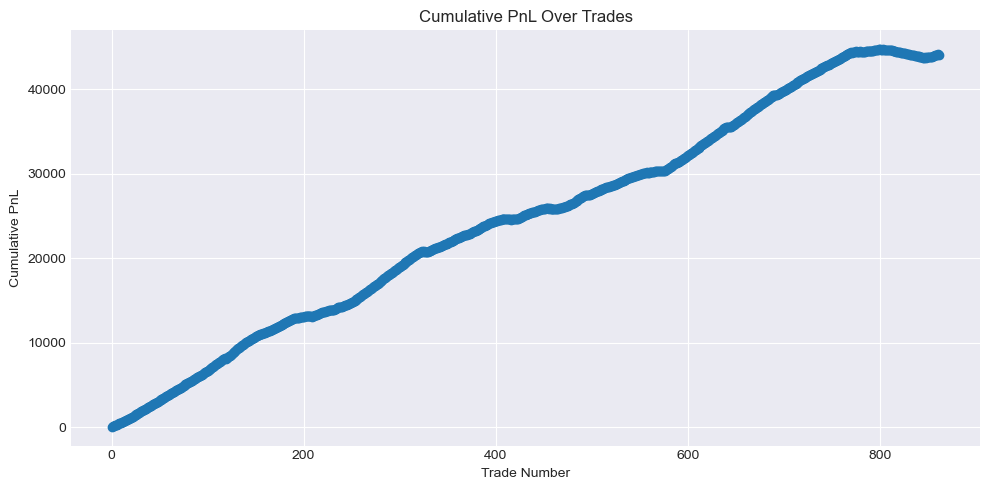

In [11]:
# Define x-axis For Trade Numbers
x_axis = range(1, len(JoydavTrades) + 1)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(x_axis, JoydavTrades['Cumulative PnL'], marker='o', linestyle='-')
plt.title('Cumulative PnL Over Trades')
plt.xlabel('Trade Number')
plt.ylabel('Cumulative PnL')
plt.grid(True)
plt.tight_layout()
plt.show()